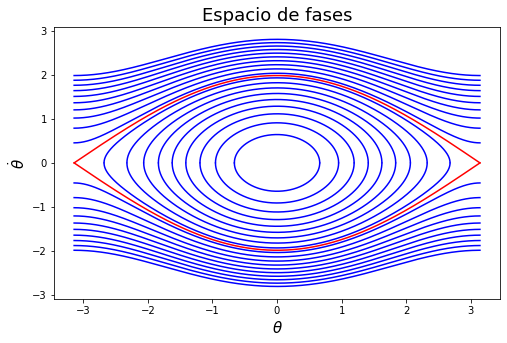

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.optimize import newton
warnings.filterwarnings('ignore')

l = 10  #largo pendulo
m = 5   #masa particula
g = 9.8   #aceleracion de gravedad

def energia(x):
    output = 2*m*g*l*x
    return output

x = np.linspace(0,2,20)
energias = []
for i in x:
    E = energia(i)
    energias.append(E)
    
def theta_punto(theta, E):
    output = np.sqrt(2*E/(m*l**2) + 2*g*(np.cos(theta)-1)/l)
    return output

teta = np.linspace(-np.pi,np.pi,100000)

plt.figure(0, figsize=(8,5))
for i in range(len(energias)):
    plt.plot(teta, theta_punto(teta,energias[i]), color = 'b')
    plt.plot(teta, -theta_punto(teta,energias[i]), color = 'b')
    plt.title('Espacio de fases', fontsize=18)
    plt.xlabel(r'$\theta$', fontsize=15)
    plt.ylabel(r'$\dot{\theta}$', fontsize=15)
    
plt.plot(teta, -theta_punto(teta,2*m*g*l), color = 'r')
plt.plot(teta, theta_punto(teta,2*m*g*l), color = 'r')    
plt.savefig('espacio_fases')

In [247]:
# Calculamos alfa de modo que la amplitud de oscilación se reduzca un 20% al cabo de 10 oscilaciones

g = 9.8
l = 3
k = np.sqrt(g/l)

theta0 = np.pi/2
theta_punto0 = 0

def func(lamda):
    w = np.sqrt(k**2-lamda**2)
    t = 2*np.pi/k
    cero = np.exp(-lamda*t)*(theta0*np.cos(w*t)+1/w*(theta_punto0+lamda*theta0)*np.sin(w*t)) - 0.8*theta0
    return cero

lamda = newton(func, 0)
alfa = -lamda/2
w = np.sqrt(k**2-lamda**2)

alfa

-0.03207287770383717

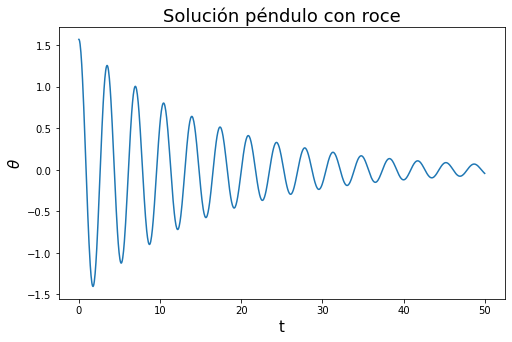

In [248]:
def theta(t, theta0, theta_punto0):
    output = np.exp(-lamda*t)*(theta0*np.cos(w*t)+1/w*(theta_punto0+lamda*theta0)*np.sin(w*t))
    return output

tiempo = np.linspace(0, 50, 1000)
plt.figure(0, figsize=(8,5))
plt.plot(tiempo, theta(tiempo, theta0, theta_punto0))
plt.xlabel('t', fontsize=15)
plt.ylabel(r'$\theta$', fontsize=15)
plt.title('Solución péndulo con roce', fontsize=18)

plt.savefig('solucion_pendulo_roce')

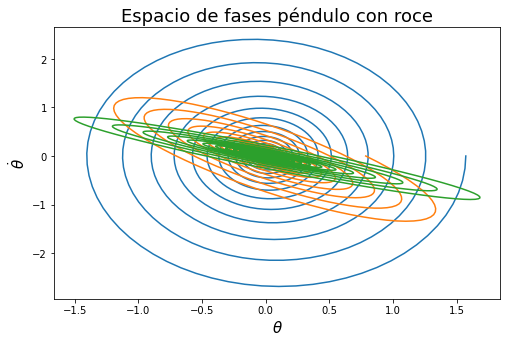

In [250]:
theta0_1 = np.pi/4
theta_punto0_1 = 2

theta0_2 = np.pi/6
theta_punto0_2 = 3


def theta_punto(t, theta0, theta):
    output = -lamda*np.exp(-lamda*t)*(theta0*np.cos(w*t)+(lamda*theta0/w+theta_punto0/w)*np.sin(w*t)) + np.exp(-lamda*t)*(-theta0*w*np.sin(w*t)+(lamda*theta0+theta_punto0)*np.cos(w*t))
    return output

plt.figure(0, figsize=(8,5))
plt.plot(theta(tiempo, theta0, theta_punto0) ,theta_punto(tiempo, theta0, theta_punto0))
plt.plot(theta(tiempo, theta0_1, theta_punto0_1) ,theta_punto(tiempo, theta0_1, theta_punto0_1))
plt.plot(theta(tiempo, theta0_2, theta_punto0_2) ,theta_punto(tiempo, theta0_2, theta_punto0_2))
plt.xlabel(r'$\theta$', fontsize=15)
plt.ylabel(r'$\dot{\theta}$', fontsize=15)
plt.title('Espacio de fases péndulo con roce', fontsize=18)

plt.savefig('espacio_fases_pendulo_roce')